<div class="alert alert-block alert-info">
Singapore Management University<br>
<i>CS105 Statistical Thinking for Data Science</i>, 2019/20 Term 2
</div>

## CS105 Wine Quality Project

>#### Table of Contents
>
>- Introduction
>- Dataset Exploration
>- Data Preprocessing
>- Exploratory Data Analysis
>    - Categorical Variables
>    - Numerical Variables
>- Model Building
>- Model Evaluation
>- Conclusion
>- References

### 1 Introduction 

Wine is an alcoholic beverages that has a number of attributes that we can measure. The 12 attributes in our dataset are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxidee, total sulfur dioxide, density, pH, sulphates, alcohol, and quality. In this research project we seek to find a correlation between the attributes of a Wine, with something all too difficult to quantify, its quality.

We seek to find the attributes of wine that actually has an impact on its perceived quality, and 

### 2 Dataset Exploration

In [24]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
data_red = pd.read_csv("winequality-red.csv", sep = ';')
data_white = pd.read_csv("winequality-white.csv", sep = ';')

In [26]:
display(data_red.head())
display(data_white.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


A quick peek with the following observations
- there are no missing values that need to be dealt with
- there are only numerical variables

In [27]:
r_rows, r_cols = data_red.shape
w_rows, w_cols = data_white.shape

print(r_rows, r_cols)
print(w_rows, w_cols)

1599 12
4898 12


There are a total of 1599 observations with 12 columns for the red wine table<br>
There are a total of 4898 observations with 12 columns for the white wine table 

In [28]:
# Get a list of numerical, categorical features

datatypes_r = data_red.dtypes

datatypes_w = data_white.dtypes

numerical_features_r = datatypes_r[datatypes_r!="object"].index
numerical_features_w = datatypes_w[datatypes_w!="object"].index

print(f"Red's # numerical features: {len(numerical_features_r)}")
print(f"White's # numerical features: {len(numerical_features_w)}")

Red's # numerical features: 12
White's # numerical features: 12


### 3 Data Preprocessing

We now look into issue of missing data.

In [29]:
# calculate percentage of non-NaN data

missing_percent_r = 1.- data_red.count() / r_rows
missing_percent_w = 1.- data_white.count() / w_rows

# filter for columns with non-zero count of NaN data

missing_percent_r[missing_percent_r>0.0]
print(f"Red # features with missing data : {len(missing_percent_r[missing_percent_r>0.0])}")

missing_percent_w[missing_percent_w>0.0]
print(f"White # features with missing data : {len(missing_percent_w[missing_percent_w>0.0])}")

Red # features with missing data : 0
White # features with missing data : 0


### 4 Exploratory Data Analysis

In this section we will perform EDA to understand the data.  The main outcome of this exercise is to help us do feature selection and feature engineering.  In other words, we want to design a set of attributes which could be used as our independent variables to predict the `Quality` in our model later.

Now we are done with preprocessing we are good to proceed with EDA.  Before that we ensure to have the correct numerical variables.

### 4.1 Visual Analysis - Box Plot Analysis

We will be conducting a box plot analysis to inspect the data for outliers

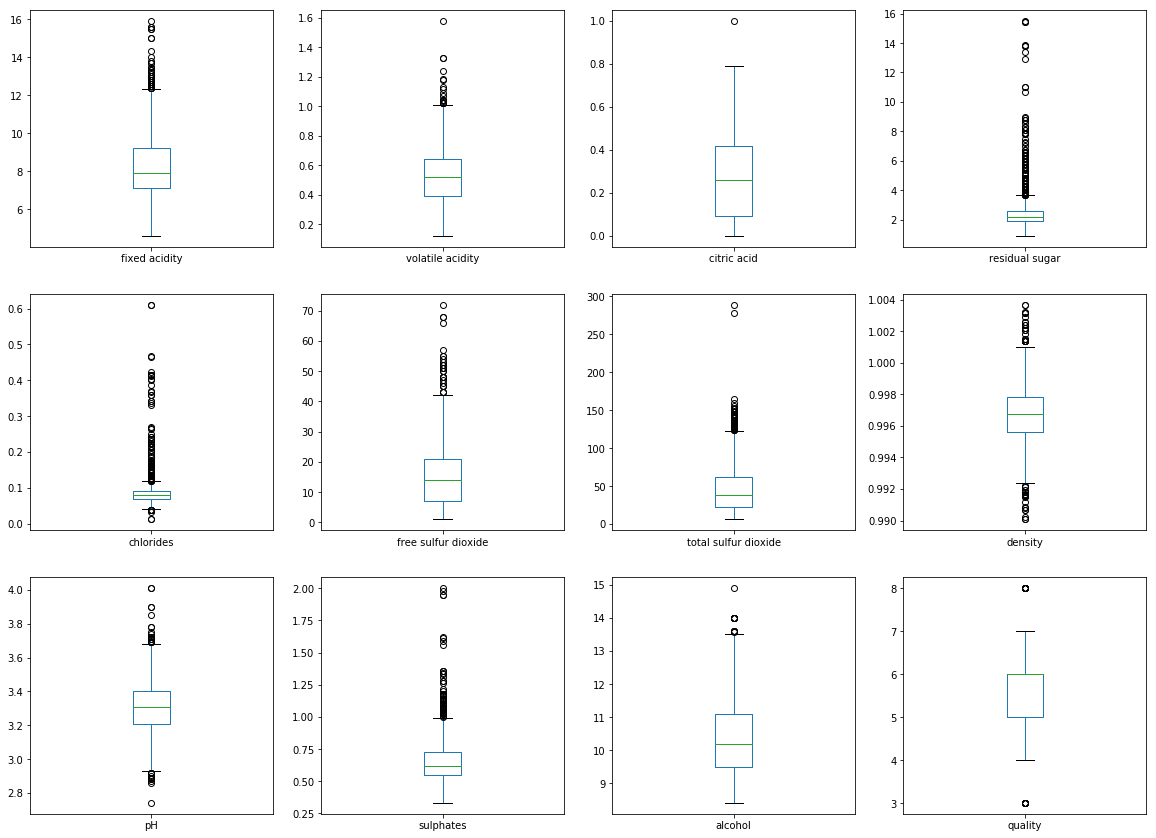

In [30]:
data_red[numerical_features_r].plot(kind='box',  subplots=True, layout=(4, 4), figsize=(20, 20))
plt.show()

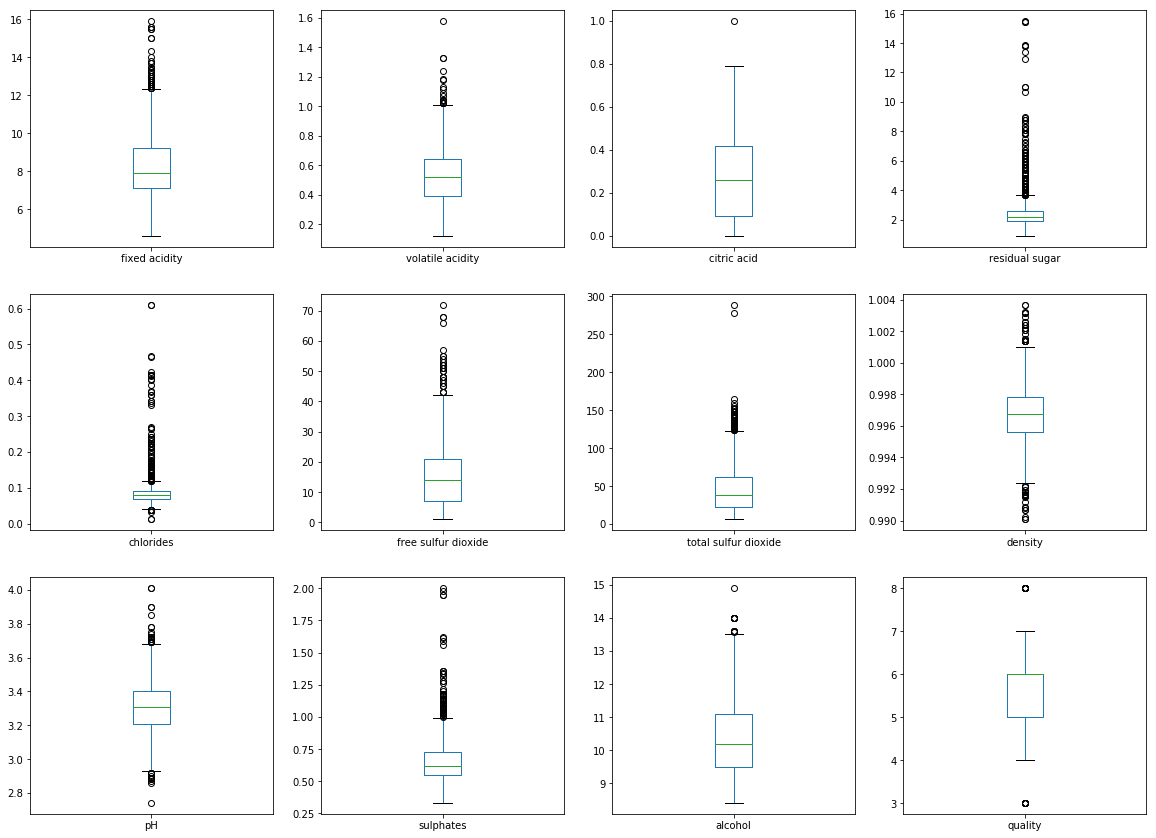

In [31]:
data_red[numerical_features_w].plot(kind='box',  subplots=True, layout=(4, 4), figsize=(20, 20))
plt.show()

From visual observation, residual sugar, chlorides and sulphates have a large amount of outliers in the upper quartile. This indicates that there are many readings on the higher end which may skew the regression model.

### 4.2 Visual Analysis - Histogram

So far we have selected two categorical variables and in fact encode them numerically.  Hence we can now focus only on numerical variables. The objective is similar here, we want to select features or engineer new features so that they can be our attributes in our model later.

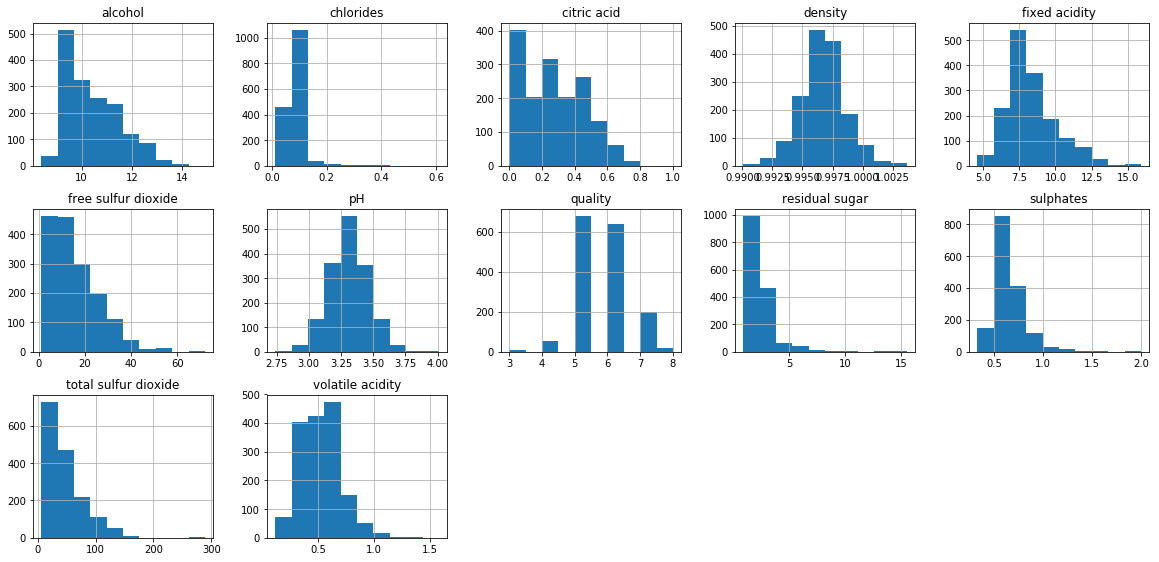

In [32]:
data_red[numerical_features_r].hist(layout=(9,5), figsize=(20,30))
plt.savefig("numerical_r.jpg")
plt.show()

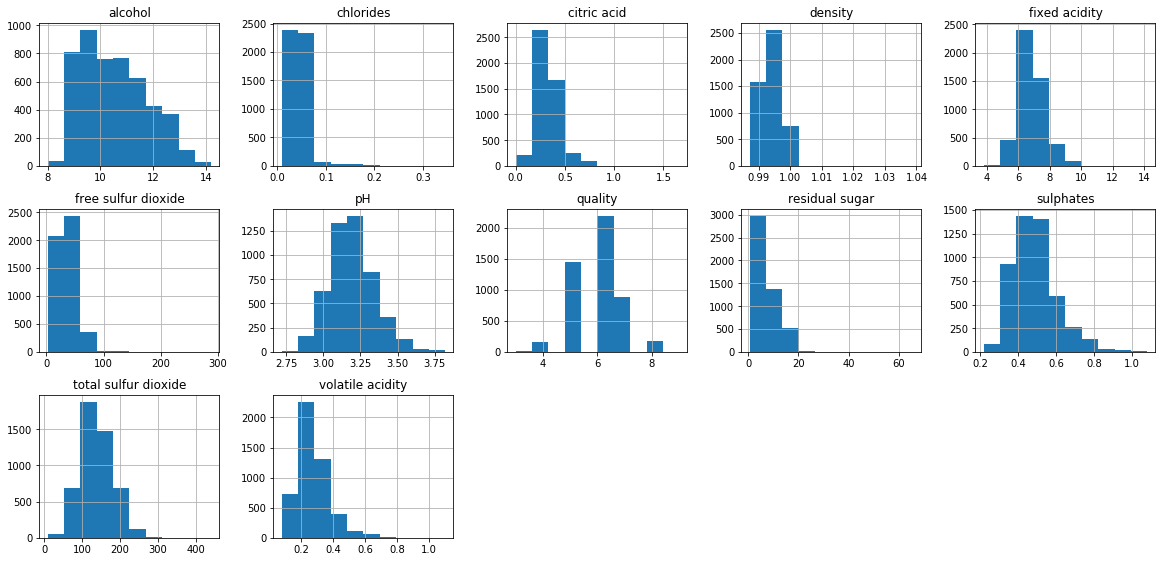

In [33]:
data_white[numerical_features_w].hist(layout=(9,5), figsize=(20,30))
plt.savefig("numerical_w.jpg")
plt.show()

Based on a visual observation we noted the following:
- Reaidual sugar is on average lower for red wine as compared to white wine.


- Overall, red wine is rated lower on average as compared to white wine.

Based on the observations above, we now select a preliminary set of variables for further EDA.  At this stage, we would want to select *interpretable* variables.  In other words, the variables should be meaningful and relatable for a domain expert.  As such our preliminary variables are `Total Flr SF`, `Total Bath`, `Total Bsmt SF`,`Bsmt Unf SF`, `Bsmt Fin SF`, `Age`,`Fireplaces`,`Garage Area`,`Gr Liv Area`,`Lot Area`,`Overall Qual`,`TotRms AbvGrd`.

### Correlation Analysis - Red Wine

In [34]:
data_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


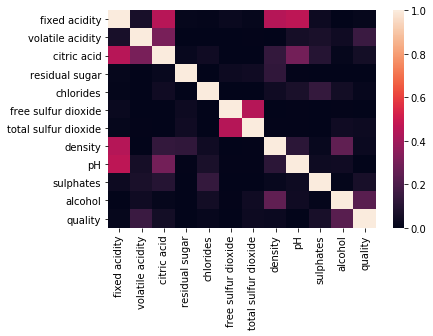

In [35]:
import seaborn as sns
r2 = data_red.corr()**2
sns.heatmap(r2)
plt.show()

The next step is to see if dependent variable `SalePrice` is correlated with our independent variables. We could do it with a correlation table or via correlation heatmap as above.  Note that in the correlation heatmap above, we calculate $r^2$ instead.  The darker the shade the lower the correlation.  We can see that `Lot Area`, `Bsmt Unf SF` are not quite correlated with `SalePrice`.  Below we write a function to select the features based on a threshold.

In [36]:
# given a dataframe df, and a target variable and threshold
# return all columns in df which are 'highly' correlated to target
# definition of 'high' correlated given by parameter threshold

def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected = corr_features(data_red, 'quality', 0.15)
print(f"updated selected features: {features_selected}")

updated selected features: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


We also want to check that our selected features are not correlated amongst each other.  Any feature that is correlated to others are in a sense *redundant*, hence we would remove them.  Again we could do a quick visual check and see that `Gr Liv Area` is highly correlated to both `Total Flr SF` and `Overall Qual` and hence it is a good candidate to be removed.  Here we have also written a function to eliminate the feature that is the most correlated one by one, untill all features are not correlated.

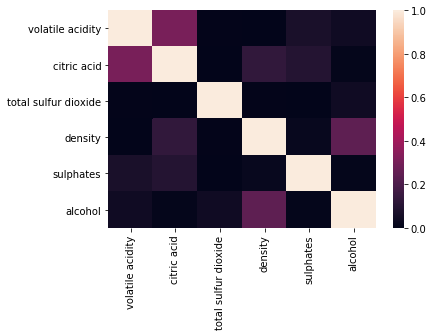

In [37]:
r2 = data_red[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

In [38]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df, threshold):
    r2_matrix = abs(df.corr())
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]


# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df, threshold):
    r2_matrix = abs(df.corr())
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n


# get a set of uncorrelated features

def get_uncorr_features(df, threshold):
    features = df.columns.tolist()
    while all_features_uncorr(df[features], threshold) == False:
        most_corr_fea = most_corr_feature(df[features], threshold)
        features.remove(most_corr_fea)
    return features

features_selected = get_uncorr_features(data_red[features_selected], 0.5)
print(f"Final selected features : {features_selected}")

Final selected features : ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


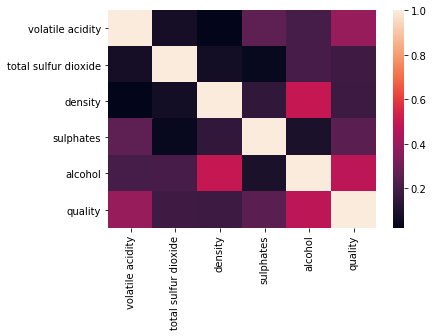

In [39]:
data_red[features_selected+['quality']].corr()
r2 = abs(data_red[features_selected+['quality']].corr())
sns.heatmap(r2)
plt.savefig("final_corr.jpg")
plt.show()

### Correlation Analysis - White Wine

In [40]:
data_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


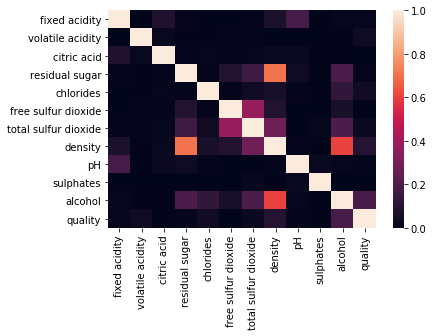

In [41]:
r2_w = data_white.corr()**2
sns.heatmap(r2_w)
plt.show()

In [42]:
def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected_w = corr_features(data_white, 'quality', 0.15)
print(f"updated selected features: {features_selected_w}")

updated selected features: ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']


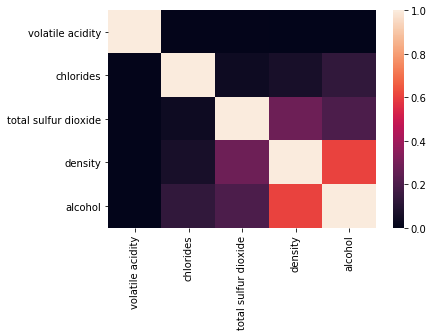

In [43]:
r2 = data_white[features_selected_w].corr()**2
sns.heatmap(r2)
plt.show()

In [44]:
features_selected_w = get_uncorr_features(data_white[features_selected_w], 0.5)
print(f"Final selected features : {features_selected_w}")

Final selected features : ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol']


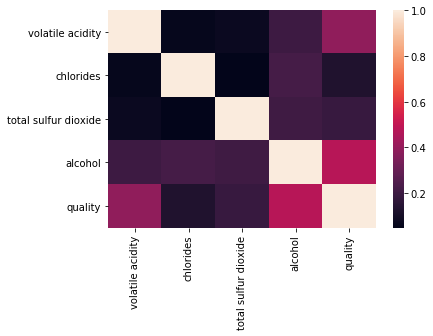

In [45]:
data_white[features_selected_w+['quality']].corr()
r2 = abs(data_red[features_selected_w+['quality']].corr())
sns.heatmap(r2)
plt.savefig("final_corr.jpg")
plt.show()

### 5 Model Building

We will build a Linear Regression model based on the selected features.  We split the dataset into train/test set and then fit our model with the train dataset and evaluate the model using the test set.

We use the `model_selection` package form `sklearn` to split our dataset randomly into 75/25 i.e. we keep 25% of the dataset for model evaluation purpose.

For model fitting, we first create instantiae a `LinearRegression` object, and subsequently call the `.fit` method.  We have also created a function to log-tranform the necessary columns.

In [46]:
## repeated 100 samples cross validation 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

result_df = pd.DataFrame(columns = ['randomstate','coeff','intercept','score_train','score_test'])
display(features_selected)

for i in range (1,100):
    X = data_red[features_selected]
    y = data_red[["quality"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)
    
    model = LinearRegression().fit(X_train, y_train)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    coef = model.coef_
    bias = model.intercept_
    
    result_df = result_df.append({'randomstate':i,'coeff': coef, 'intercept': bias, 'score_train': r2_train, 'score_test':r2_test}, ignore_index=True)
    

display(result_df.head())



['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

,randomstate,coeff,intercept,score_train,score_test
0,1,"[[-1.3278475848940179, -0.0025868033149854643,...",[-2.977346689238126],0.358136,0.325940
1,2,"[[-1.3174633281129584, -0.0022768443413508275,...",[-16.75651635061648],0.339723,0.332878
2,3,"[[-1.183359732948285, -0.0021477126463153124, ...",[0.6707694006573206],0.352898,0.332189
3,4,"[[-1.232766657933017, -0.002191778643397845, 1...",[1.637587393673003],0.352745,0.332888
4,5,"[[-1.3094785824948951, -0.0015310537526477658,...",[-16.14321141313436],0.323240,0.358235


In [47]:
# result_df.to_excel("output.xlsx")

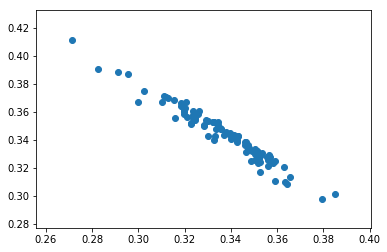

In [48]:
#visualisation of the different score_test and score_train

import matplotlib as matplot
matplot.pyplot.scatter(result_df['score_test'],result_df['score_train'])

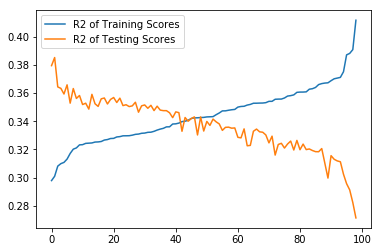

In [49]:
#selecting the model where the R2 values have the smallest difference, ie the point of intersection

result_df_line = result_df.sort_values(by = 'score_train', ascending = True)
result_df_line = result_df_line.reset_index()

matplot.pyplot.plot(result_df_line.index, result_df_line['score_train'], label = 'R2 of Training Scores')
matplot.pyplot.plot(result_df_line.index, result_df_line['score_test'], label = 'R2 of Testing Scores')
matplot.pyplot.legend()


In [50]:
# selecting the best equation from the random state
# selecting the model with the smallest difference between r2 value for score_train and score_test

result_df["score_difference"] = abs(result_df["score_train"] - result_df["score_test"])

result_df = result_df.sort_values(by = 'score_difference', ascending = True)
result_df = result_df.reset_index()
display(result_df.head())

bestrandomstate_1 = result_df["randomstate"][0]
bestcoeff_1 = result_df["coeff"][0]
bestintercept_1 = result_df["intercept"][0]
bestscore_train_1 = result_df["score_train"][0]
bestscore_test_1 = result_df["score_test"][0]

bestrandomstate_2 = result_df["randomstate"][1]
bestcoeff_2 = result_df["coeff"][1]
bestintercept_2 = result_df["intercept"][1]
bestscore_train_2 = result_df["score_train"][1]
bestscore_test_2 = result_df["score_test"][1]

bestrandomstate_3 = result_df["randomstate"][2]
bestcoeff_3 = result_df["coeff"][2]
bestintercept_3 = result_df["intercept"][2]
bestscore_train_3 = result_df["score_train"][2]
bestscore_test_3 = result_df["score_test"][2]

print(f"Features : {features_selected}")
print()

print("--- Best Model ---")
print(f"Random Seed: {bestrandomstate_1}")
print(f"Coefficients: {bestcoeff_1}")
print(f"Intercept : {bestintercept_1}")
print(f"R2 of Training Set : {bestscore_train_1}")
print(f"R2 of Testing Set : {bestscore_test_1}")
print()

print("--- 2nd Model ---")
print(f"Random Seed: {bestrandomstate_2}")
print(f"Coefficients: {bestcoeff_2}")
print(f"Intercept : {bestintercept_2}")
print(f"R2 of Training Set : {bestscore_train_2}")
print(f"R2 of Testing Set : {bestscore_test_2}")
print()

print("--- 3rd Model ---")
print(f"Random Seed: {bestrandomstate_3}")
print(f"Coefficients: {bestcoeff_3}")
print(f"Intercept : {bestintercept_3}")
print(f"R2 of Training Set : {bestscore_train_3}")
print(f"R2 of Testing Set : {bestscore_test_3}")
print()

                     
                      

,index,randomstate,coeff,intercept,score_train,score_test,score_difference
0,71,72,"[[-1.163836281585176, -0.00210984922857631, -1...",[15.160867075110506],0.341953,0.341898,0.000056
1,62,63,"[[-1.2547610244409493, -0.0024117405618375738,...",[4.46917703500318],0.342617,0.343051,0.000434
2,30,31,"[[-1.337228376258548, -0.0024380198616538815, ...",[-10.45301669592244],0.340686,0.340021,0.000665
3,89,90,"[[-1.2172852977011925, -0.001889886408765547, ...",[0.7073598499333107],0.342356,0.343065,0.000709
4,57,58,"[[-1.1295751829141016, -0.001788187819195295, ...",[9.188826827081513],0.343253,0.341517,0.001736


Features : ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

--- Best Model ---
Random Seed: 72
Coefficients: [[-1.16383628e+00 -2.10984923e-03 -1.21430612e+01  7.40561858e-01
   2.69940643e-01]]
Intercept : [15.16086708]
R2 of Training Set : 0.34195337261259273
R2 of Testing Set : 0.3418976697572238

--- 2nd Model ---
Random Seed: 63
Coefficients: [[-1.25476102 -0.00241174 -1.63038196  0.81370711  0.29018477]]
Intercept : [4.46917704]
R2 of Training Set : 0.34261721822066116
R2 of Testing Set : 0.3430509246183647

--- 3rd Model ---
Random Seed: 31
Coefficients: [[-1.33722838e+00 -2.43801986e-03  1.33247747e+01  5.00549488e-01
   3.14081525e-01]]
Intercept : [-10.4530167]
R2 of Training Set : 0.3406859783969639
R2 of Testing Set : 0.34002081757160296



### 6 Model Evaluation & Sensitivity Analysis

In [51]:
## model evaluation

from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_1)

model = LinearRegression().fit(X_train, y_train)

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("Model Evaluation")
print()

print("-------- Best Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

def atleasterror(df1, df2, error_range):
    outputdf = pd.DataFrame(columns = ['error'])
    for i in range (0, df1.size):
        #display(df1[i])
        #display(df2[i])
        
        if abs(df1[i] - df2[i]) > error_range:
            error = abs(df1[i]-df2[i]) - error_range
            #display(error)
            outputdf = outputdf.append({'error': error}, ignore_index = True)
        else:
            #display(0)
            outputdf = outputdf.append({'error': 0}, ignore_index = True)
    return outputdf

    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

display(bestmodel_df.head())

# determing mean absolute error
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

print(f"With a tolerance value of 0.25, the MAE is {error_25_mean}, which as a percentage of mean is {error_25_mean/ave}")
print(f"With a tolerance value of 0.5, the MAE is {error_50_mean}, which as a percentage of mean is {error_50_mean/ave}")
print(f"With a tolerance value of 0.75, the MAE is {error_75_mean}, which as a percentage of mean is {error_75_mean/ave}")
print(f"With a tolerance value of 1, the MAE is {error_100_mean}, which as a percentage of mean is {error_100_mean/ave}")
print()

##############
# Similar evaulation code for 2nd model
##############

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_2)

model = LinearRegression().fit(X_train, y_train)

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("-------- 2nd Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

def atleasterror(df1, df2, error_range):
    outputdf = pd.DataFrame(columns = ['error'])
    for i in range (0, df1.size):
        #display(df1[i])
        #display(df2[i])
        
        if abs(df1[i] - df2[i]) > error_range:
            error = abs(df1[i]-df2[i]) - error_range
            #display(error)
            outputdf = outputdf.append({'error': error}, ignore_index = True)
        else:
            #display(0)
            outputdf = outputdf.append({'error': 0}, ignore_index = True)
    return outputdf

    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

display(bestmodel_df.head())

# determing mean absolute error
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

print(f"With a tolerance value of 0.25, the MAE is {error_25_mean}, which as a percentage of mean is {error_25_mean/ave}")
print(f"With a tolerance value of 0.5, the MAE is {error_50_mean}, which as a percentage of mean is {error_50_mean/ave}")
print(f"With a tolerance value of 0.75, the MAE is {error_75_mean}, which as a percentage of mean is {error_75_mean/ave}")
print(f"With a tolerance value of 1, the MAE is {error_100_mean}, which as a percentage of mean is {error_100_mean/ave}")
print()

##############
# Similar evaulation code for 3nd model
##############

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_3)

model = LinearRegression().fit(X_train, y_train)

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("-------- 3rd Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

def atleasterror(df1, df2, error_range):
    outputdf = pd.DataFrame(columns = ['error'])
    for i in range (0, df1.size):
        #display(df1[i])
        #display(df2[i])
        
        if abs(df1[i] - df2[i]) > error_range:
            error = abs(df1[i]-df2[i]) - error_range
            #display(error)
            outputdf = outputdf.append({'error': error}, ignore_index = True)
        else:
            #display(0)
            outputdf = outputdf.append({'error': 0}, ignore_index = True)
    return outputdf

    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

display(bestmodel_df.head())

# determing mean absolute error
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

print(f"With a tolerance value of 0.25, the MAE is {error_25_mean}, which as a percentage of mean is {error_25_mean/ave}")
print(f"With a tolerance value of 0.5, the MAE is {error_50_mean}, which as a percentage of mean is {error_50_mean/ave}")
print(f"With a tolerance value of 0.75, the MAE is {error_75_mean}, which as a percentage of mean is {error_75_mean/ave}")
print(f"With a tolerance value of 1, the MAE is {error_100_mean}, which as a percentage of mean is {error_100_mean/ave}")

Model Evaluation

-------- Best Model --------
Mean Absolute Error: 0.52
MAE as % of mean: 0.09



,y_pred,y_actual,error_0.25,error_0.5,error_0.75,error_1
0,5.505770,6,0.244230,0,0,0
1,5.208682,6,0.541318,0.291318,0.041318,0
2,5.764920,6,0.000000,0,0,0
3,5.395730,6,0.354270,0.10427,0,0
4,5.049391,5,0.000000,0,0,0


With a tolerance value of 0.25, the MAE is 0.30797010059658275, which as a percentage of mean is 0.05472591747606979
With a tolerance value of 0.5, the MAE is 0.1688535503365597, which as a percentage of mean is 0.03000507336056147
With a tolerance value of 0.75, the MAE is 0.08509071492898145, which as a percentage of mean is 0.01512051797938364
With a tolerance value of 1, the MAE is 0.04357093814674814, which as a percentage of mean is 0.007742503446778878

-------- 2nd Model --------
Mean Absolute Error: 0.49
MAE as % of mean: 0.09



,y_pred,y_actual,error_0.25,error_0.5,error_0.75,error_1
0,6.118609,6,0,0,0,0
1,5.157655,5,0,0,0,0
2,5.204757,5,0,0,0,0
3,5.110561,5,0,0,0,0
4,6.125688,7,0.624312,0.374312,0.124312,0


With a tolerance value of 0.25, the MAE is 0.2827624541598716, which as a percentage of mean is 0.05007969079652364
With a tolerance value of 0.5, the MAE is 0.15043092052578413, which as a percentage of mean is 0.026642624844061834
With a tolerance value of 0.75, the MAE is 0.07365288895292114, which as a percentage of mean is 0.013044567447938214
With a tolerance value of 1, the MAE is 0.033152263117938514, which as a percentage of mean is 0.005871554238288866

-------- 3rd Model --------
Mean Absolute Error: 0.50
MAE as % of mean: 0.09



,y_pred,y_actual,error_0.25,error_0.5,error_0.75,error_1
0,5.813367,6,0,0,0,0
1,6.262291,7,0.487709,0.237709,0,0
2,5.275650,5,0.0256495,0,0,0
3,5.540798,4,1.2908,1.0408,0.790798,0.540798
4,6.078310,5,0.82831,0.57831,0.32831,0.0783105


With a tolerance value of 0.25, the MAE is 0.2864339251633291, which as a percentage of mean is 0.05068505643235197
With a tolerance value of 0.5, the MAE is 0.15407312838548287, which as a percentage of mean is 0.02726354848670345
With a tolerance value of 0.75, the MAE is 0.07690128206017083, which as a percentage of mean is 0.013607835799189706
With a tolerance value of 1, the MAE is 0.039050417621382526, which as a percentage of mean is 0.0069100495680393765


### 7 Conclusion



\begin{equation}
 SalePrice = 18759 + 67 \times Total Flr SF + 8225 \times Total Bath + 34 \times Total Bsmt SF - 643 \times Age + 66 \times Garage Area
\end{equation}


### 8 References
- Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
- Data Dictionary: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt